## Introduction
** **
Topic Models, in a nutshell, are a type of statistical language models used for uncovering hidden structure in a collection of texts. In a practical and more intuitively, you can think of it as a task of:

- **Dimensionality Reduction**, where rather than representing a text T in its feature space as {Word_i: count(Word_i, T) for Word_i in Vocabulary}, you can represent it in a topic space as {Topic_i: Weight(Topic_i, T) for Topic_i in Topics}
- **Unsupervised Learning**, where it can be compared to clustering, as in the case of clustering, the number of topics, like the number of clusters, is an output parameter. By doing topic modeling, we build clusters of words rather than clusters of texts. A text is thus a mixture of all the topics, each having a specific weight
- **Tagging**, abstract “topics” that occur in a collection of documents that best represents the information in them.

There are several existing algorithms you can use to perform the topic modeling. The most common of it are, Latent Semantic Analysis (LSA/LSI), Probabilistic Latent Semantic Analysis (pLSA), and Latent Dirichlet Allocation (LDA)

In this tutorial, we’ll take a closer look at LDA, and implement our first topic model using the sklearn implementation in python 2.7

### Theoretical Overview
LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

![LDA_Model](https://github.com/chdoig/pytexas2015-topic-modeling/blob/master/images/lda-4.png?raw=true)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i

#### Parameters of LDA

- `Alpha parameter` is Dirichlet prior concentration parameter that represents document-topic density — with a higher alpha, documents are assumed to be made up of more topics and result in more specific topic distribution per document.
- `Beta parameter` is the same prior concentration parameter that represents topic-word density — with high beta, topics are assumed to made of up most of the words and result in a more specific word distribution per topic.

**To read more: https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0**

** **
### LDA Implementation

1. [Loading data](#load_data)
2. [Data cleaning](#clean_data)
3. [Exploratory analysis](#eda)
4. [Prepare data for LDA analysis](#data_preparation)
5. [LDA model training](#train_model)
6. [Analyzing LDA model results](#results)

** **
For this tutorial, we’ll use the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016 (29 years!). These papers discuss a wide variety of topics in machine learning, from neural networks to optimization methods, and many more.

<img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_158/img/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)">

Let’s start by looking at the content of the file

** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **

In [ ]:
import SouperDuper as SD
import pandas as pd
corpus = []
agniYoga = "https://subtlerealm.org"

SubtleRealm = SD.Souper(agniYoga)
SubtleRealmSoup = SubtleRealm.scoop()
for lnk in SubtleRealmSoup.findAll("a"):
    corpus.append(agniYoga+lnk.get("href"))       
#for s in tOCSoup.find_all("ul",attrs={"id":"navRight"}):
corpus.pop()
scrapes = [SD.Souper(url).scoop() for url in corpus]
stext =[s.text for s in scrapes]
scraped = pd.DataFrame(data = {"url": corpus,"raw_text":stext} )
scraped.to_csv("subtlerealm.csv")

# ----------------------------------------------------------start here
 -------------------------------------------------------------------------------------------------------------------------------------------

In [11]:
%ls

rgoodcompute/


In [1]:
# Importing modules
import pandas as pd
import os

# os.chdir('Users/Richard.Good')

os.getcwd()

'/mnt/batch/tasks/shared/LS_root/mounts/clusters/rgoodcompute/code/Users/Richard.Good'

In [2]:
# 

In [3]:


# Read data into papers
# papers = pd.read_csv('subtlerealm.csv')

# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '3c3bb71f-3a4c-436f-9e0a-7407d75a82fa'
resource_group = '2020-10-dsi-wd-mlspace-rg'
workspace_name = '2022dsiwdazureml'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='youtube_table')
papers = dataset.take_sample(0.05, seed=1234).to_pandas_dataframe()

# Print head
papers.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,description
0,BNeDH6UTmXw,Ten Minutes with Tyler Cameron | Q&A,2020-08-11T22:00:05Z,UCMw7m-ScQ6jV1FQzQnn1y8Q,Tyler Cameron,22,2020-08-12T00:00:00Z,the bachelor|the bachelorette|Tyler c|Tyler Ca...,105955,4511,69,673,False,False,Come hang out me with me for 10 minutes where ...
1,6TIsR_7nrNc,Kylie Jenner Reacts To 'WAP' Music Video Backlash,2020-08-10T18:41:19Z,UC2rJLq19N0dGrxfib80M_fg,HollywoodLife,24,2020-08-12T00:00:00Z,kylie jenner|kendall jenner|cardi b|wap|reacts...,1007540,10102,7932,2763,False,False,Kylie Jenner dissed over cameo in Cardi B and ...
2,XsmkTqsygD4,42 Dugg - Big 4's (Official Video),2020-08-10T21:02:21Z,UChFLDvWugOtrzxmUCAjfnGg,42 dugg Music,10,2020-08-12T00:00:00Z,[None],494247,15761,344,811,False,False,From the album Young & Turnt 2 (Deluxe). Out n...
3,JNJN5HMkRao,Saved by the Bell | Official Teaser 2 | Peacock,2020-08-10T18:19:51Z,UCPgMAS8woHJ_o_OZdTR7kcQ,Peacock,24,2020-08-12T00:00:00Z,peacock|peacock tv|peacock originals|peacock s...,449198,1341,349,315,False,False,Saved by the Bell is back - to the MAX! Check ...
4,oXTcmpnjdBk,Collin Morikawa Hits Incredible Drive to Win 2...,2020-08-10T00:49:11Z,UCnUYyAtDiyeaobSzKqVE_BA,PGA,17,2020-08-12T00:00:00Z,collin morikawa|2020 pga championship|harding ...,207978,1182,59,182,False,False,23-year-old Collin Morikawa hit a near-perfect...


In [4]:
type(dataset)

azureml.data.tabular_dataset.TabularDataset

** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 100 papers

##### Remove punctuation/lower casing

Next, let’s perform a simple preprocessing on the content of `paper_text` column to make them more amenable for analysis, and reliable results. To do that, we’ll use a regular expression to remove any punctuation, and then lowercase the text

In [5]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['description'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

0    come hang out me with me for 10 minutes where ...
1    kylie jenner dissed over cameo in cardi b and ...
2    from the album young & turnt 2 (deluxe) out no...
3    saved by the bell is back - to the max check o...
4    23-year-old collin morikawa hit a near-perfect...
Name: paper_text_processed, dtype: object

In [6]:
!python -m spacy validate

✔ Loaded compatibility table

====================== Installed models (spaCy v2.2.4) ======================
ℹ spaCy installation:
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/spacy

TYPE      NAME             MODEL            VERSION                            
package   en-core-web-sm   en_core_web_sm   2.2.5   ✔



In [7]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [8]:
import gensim
from gensim.utils import simple_preprocess

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

# fullpapers = papers.copy()
# papers = fullpapers.sample(frac=0.05)

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:1][0][:30])

# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
#### Remove Stopwords, Make Bigrams and Lemmatize
# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','contact', 'us' ,'subtlerealm'
    , 'welcome', 'skip', 'main', 'content', 'user', 'blog', 'menu', 'login', 
        'register', 'search', 'featured_artist','form', 'discussion' ,'menu','reviewsbooks_movie',
'earle_blog','featured_artist','years_month',   'home', 'overall', 'edgar_reye',"blogthom"
,"forum_tag","earle_blog","navigation_introduction","reviewbooks_movie","papers_tool"
,"thing",'edgar', 'dialog',"https", "http", "wwwyoutubecom", "bitly", "que", "twittercom"
, "la", "amznto", "wwwinstagramcom", "de", "channel", "en", "music", "youtube", "official", "watchv", 
"news", "te", "sports", "wwwfacebookcom", "fox", "like", "video", "nba", "instagram", "tu", "know", 
"foxspt", "se", "licenses", "golf", "notifications", "commons", "thumbnail", 
"macleod", "incompetechcom", "attribution", "plays", "patreoncom", "pond", "pages", "stray", 
"preston", "steam", "anime", "yestheory", "playtime", "donate", "teespringcom", "utm_medium",
"poppy", "sneaky", "patron", "macleodlink", "utm_source", "dribble", "utm_campaign", "wwwredditcom", 
"watchv", "button", "wwwpatreoncom", "hl", "wwwtwitchtv", "patreon", "code", "discordgg", "support", "discord", 
"wwwyoutubecom", "email", "licensed", "https", "channel", "merch", "wwwinstagramcom", "twittercom", "thank", "twitch", 
"youtubecom", "business", "link", "instagram", "twitter", "youtube", "video", "videos", "thanks", "follow", "wwwtiktokcom", 
"tiktok", "join", "playlistlist", "subscribe", "free", "http", "get", "wwwfacebookcom", "music", "instagramcom", "new", "bitly", 
"cause", "wanna", "gonna", "em", "dude", "shit", "fuck", "bitch", "gotta", "base", "pull", "blackpink", "shut", "verse", "feast", 
 "nigga",  "whoa", "taste", "gon", "chrome", "clip", "trick", "quick", "sleep", "chorus", "niggas", "youi", "rings", 
"say", "perfect", "feel", "girl", "gone", "know", "ones", "still", "nothing", "tell", "mind", "yeah", "think", "hot", "got", "never",
"could", "love", "need", "come", "like", "put", "let", "little", "oh", "keep", "go", "back", "want", "see", "right", "one", "make",
 "get", "life", "time", "take", "way", "good", "baby", "best", "video", "el", "espn", "un", "por", "lnkto", "guy", "dj", "mtv", 
 "sin", "playnext", "showtime", "wendover",  "lyricist", "soul", "guccimanelnkto", "thenew", 
  "kodak", "teen", "deezer", "foundee", "tree", "extended", "con", "records", "official", 
 "vevoly", "album", "ti", "bts", "smarturlit", "feat", "productions", "division", "twice", "music", "performing", "artist", 
 "listen", "llc", "https", "wwwfacebookcom", "stream", "twittercom", "wwwinstagramcom",  "soundcloudcom", "wwwtiktokcom",
 "spotify", "http", "download", "youtube", "facebook", "follow", "instagram", "video", "instagramcom", "subscribe", "twitter", 
 "entertainment", "channel", "sidemen",  "offlinetv",  "plwgyu", 
 "dazn", "miniminter", "teams", "getty",  "promo",  "amp", "buffly", "ksi", "jesser", "aew", "smallant", 
 "redditcom", "lets", "tier", "offers", "violet", "gq", "vegas",  "podcasts", "tonight", "bitly",  
 "http", "sky", "wwwtwittercom", "wwwyoutubecom", "united", "https", "googl", "late",  "subscribe", "twittercom", 
 "wwwinstagramcom", "show", "channel", "twitter", "instagram", "instagramcom", "facebook", "youtube", "wwwfacebookcom", "follow", 
 "watch", "youtubecom", "playlistlist", "get", "pm","new", "videos", "tiktok", "merch", "nbc", "kgslink",  
 "paramount", "award", "national", "cnbc", "agt", "nbcsportscom", "breakdown", "analysis",  
 "theaters", "states", "swim", "south", "expensive",  "iconic", "beginning", "easter",  
 "instead", "culture",  "netflix", "movies", "trailer", 
 "premier", "episodes",  "streaming", "shows", "history",  "voice", "film", "movie", "minutes", 
 "co", "tv",  "across", "world",  "watch", "new", "full", "latest", "series", "got", "subscribe", 
 "show", "bitly",  "first", "http", "policy", "guardian", 
 "collect", "clashofclans",  "vogue",  "dive", 
 "completely", "scarlet",  "supercellcom", "rewards",  
  "players", "prime", "terms",  "ps",  "event", "play", "season", "build", 
  "new",  "pass", "world", "free", "also", "online", "one", "super", 
 "download", "years", "http", "series", "star", "en", "team",  "smp", "similar", "hermitcraft", 
 "faveco",  "linksco", "nickeh",  "missed",  "rivera", "mobs", "agent", "grian", "dev", 
 "manhunt", "sypherpk", "lifesteal", "lexi", "squishies", "wadzee", "squishy", "makeovers", 
 "moriah",  "beauty", "days", "item",  "shop", "mod", "server", "custom", 
  "video", "today", "speed", "used",  "enjoy", "built", "https", "new", "make", "like", "videos", "world", 
 "links",  "hope", "discordgg", "made", "twitter", "also", "wwe",  "fnaf", "lens", "pts", "iron",
  "evanandkatelyn", "reb", "ast", "usanettv", "matpat",   "lifestyle", "normal",
"mic",  "vaatividya", "results",  "dome", "chrisfix", "nebula",  "theorywearcom",
 "amznto", "lore",  "pro", "parts",  "affiliate",
"wwwamazoncom",  "day", "https", "bitly", "sound",  "http",   "product",
"youtube", "get", "links",  "new",  "foxspt", "grip", "whip", "undisputed", 
"uefa", "pbc",  "bwf",  "sprtspodfox",  "tmzme",
 "ligue",  "il",  
 "ac",  "wright", 
"lee",  "sports",   "st",  "nd",  "ad", 
 "youtube", "channel", "http", "first", "live", "app", "latest", "que", "te", "tu", "lo", "es", "como", "una", 
"le", "del", "mas", "quiero", "pero", "esta", "para", "soy", "todo", "ella", "aqui", "eso", "cuando", "tengo", "estoy",
"mia", "asi", "punto", "voy", "ver", "otra", "ni", "smllnkto",
 "la", "mi", "se", "si", "de", "su", "yo", "las", "va", "na", "en", "los", "al", "pa", "ya"])

new_stopwords = ['from', 'subject', 're', 'edu', 'use','contact', 'us' ,'subtlerealm'
    , 'welcome', 'skip', 'main', 'content', 'user', 'blog', 'menu', 'login', 
        'register', 'search', 'featured_artist','form', 'discussion' ,'menu','reviewsbooks_movie',
'earle_blog','featured_artist','years_month',   'home', 'overall', 'edgar_reye',"blogthom"
,"forum_tag","earle_blog","navigation_introduction","reviewbooks_movie","papers_tool"
,"thing",'edgar', 'dialog',"https", "http", "wwwyoutubecom", "bitly", "que", "twittercom"
, "la", "amznto", "wwwinstagramcom", "de", "channel", "en", "music", "youtube", "official", "watchv", 
"news", "te", "sports", "wwwfacebookcom", "fox", "like", "video", "nba", "instagram", "tu", "know", 
"foxspt", "se", "licenses", "golf", "notifications", "commons", "thumbnail", 
"macleod", "incompetechcom", "attribution", "plays", "patreoncom", "pond", "pages", "stray", 
"preston", "steam", "anime", "yestheory", "playtime", "donate", "teespringcom", "utm_medium",
"poppy", "sneaky", "patron", "macleodlink", "utm_source", "dribble", "utm_campaign", "wwwredditcom", 
"watchv", "button", "wwwpatreoncom", "hl", "wwwtwitchtv", "patreon", "code", "discordgg", "support", "discord", 
"wwwyoutubecom", "email", "licensed", "https", "channel", "merch", "wwwinstagramcom", "twittercom", "thank", "twitch", 
"youtubecom", "business", "link", "instagram", "twitter", "youtube", "video", "videos", "thanks", "follow", "wwwtiktokcom", 
"tiktok", "join", "playlistlist", "subscribe", "free", "http", "get", "wwwfacebookcom", "music", "instagramcom", "new", "bitly", 
"cause", "wanna", "gonna", "em", "dude", "shit", "fuck", "bitch", "gotta", "base", "pull", "blackpink", "shut", "verse", "feast", 
 "nigga",  "whoa", "taste", "gon", "chrome", "clip", "trick", "quick", "sleep", "chorus", "niggas", "youi", "rings", 
"say", "perfect", "feel", "girl", "gone", "know", "ones", "still", "nothing", "tell", "mind", "yeah", "think", "hot", "got", "never",
"could", "love", "need", "come", "like", "put", "let", "little", "oh", "keep", "go", "back", "want", "see", "right", "one", "make",
 "get", "life", "time", "take", "way", "good", "baby", "best", "video", "el", "espn", "un", "por", "lnkto", "guy", "dj", "mtv", 
 "sin", "playnext", "showtime", "wendover",  "lyricist", "soul", "guccimanelnkto", "thenew", 
  "kodak", "teen", "deezer", "foundee", "tree", "extended", "con", "records", "official", 
 "vevoly", "album", "ti", "bts", "smarturlit", "feat", "productions", "division", "twice", "music", "performing", "artist", 
 "listen", "llc", "https", "wwwfacebookcom", "stream", "twittercom", "wwwinstagramcom",  "soundcloudcom", "wwwtiktokcom",
 "spotify", "http", "download", "youtube", "facebook", "follow", "instagram", "video", "instagramcom", "subscribe", "twitter", 
 "entertainment", "channel", "sidemen",  "offlinetv",  "plwgyu", 
 "dazn", "miniminter", "teams", "getty",  "promo",  "amp", "buffly", "ksi", "jesser", "aew", "smallant", 
 "redditcom", "lets", "tier", "offers", "violet", "gq", "vegas",  "podcasts", "tonight", "bitly",  
 "http", "sky", "wwwtwittercom", "wwwyoutubecom", "united", "https", "googl", "late",  "subscribe", "twittercom", 
 "wwwinstagramcom", "show", "channel", "twitter", "instagram", "instagramcom", "facebook", "youtube", "wwwfacebookcom", "follow", 
 "watch", "youtubecom", "playlistlist", "get", "pm","new", "videos", "tiktok", "merch", "nbc", "kgslink",  
 "paramount", "award", "national", "cnbc", "agt", "nbcsportscom", "breakdown", "analysis",  
 "theaters", "states", "swim", "south", "expensive",  "iconic", "beginning", "easter",  
 "instead", "culture",  "netflix", "movies", "trailer", 
 "premier", "episodes",  "streaming", "shows", "history",  "voice", "film", "movie", "minutes", 
 "co", "tv",  "across", "world",  "watch", "new", "full", "latest", "series", "got", "subscribe", 
 "show", "bitly",  "first", "http", "policy", "guardian", 
 "collect", "clashofclans",  "vogue",  "dive", 
 "completely", "scarlet",  "supercellcom", "rewards",  
  "players", "prime", "terms",  "ps",  "event", "play", "season", "build", 
  "new",  "pass", "world", "free", "also", "online", "one", "super", 
 "download", "years", "http", "series", "star", "en", "team",  "smp", "similar", "hermitcraft", 
 "faveco",  "linksco", "nickeh",  "missed",  "rivera", "mobs", "agent", "grian", "dev", 
 "manhunt", "sypherpk", "lifesteal", "lexi", "squishies", "wadzee", "squishy", "makeovers", 
 "moriah",  "beauty", "days", "item",  "shop", "mod", "server", "custom", 
  "video", "today", "speed", "used",  "enjoy", "built", "https", "new", "make", "like", "videos", "world", 
 "links",  "hope", "discordgg", "made", "twitter", "also", "wwe",  "fnaf", "lens", "pts", "iron",
  "evanandkatelyn", "reb", "ast", "usanettv", "matpat",   "lifestyle", "normal",
"mic",  "vaatividya", "results",  "dome", "chrisfix", "nebula",  "theorywearcom",
 "amznto", "lore",  "pro", "parts",  "affiliate",
"wwwamazoncom",  "day", "https", "bitly", "sound",  "http",   "product",
"youtube", "get", "links",  "new",  "foxspt", "grip", "whip", "undisputed", 
"uefa", "pbc",  "bwf",  "sprtspodfox",  "tmzme",
 "ligue",  "il",  
 "ac",  "wright", 
"lee",  "sports",   "st",  "nd",  "ad", 
 "youtube", "channel", "http", "first", "live", "app", "latest", "que", "te", "tu", "lo", "es", "como", "una", 
"le", "del", "mas", "quiero", "pero", "esta", "para", "soy", "todo", "ella", "aqui", "eso", "cuando", "tengo", "estoy",
"mia", "asi", "punto", "voy", "ver", "otra", "ni", "smllnkto",
 "la", "mi", "se", "si", "de", "su", "yo", "las", "va", "na", "en", "los", "al", "pa", "ya"]

# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    interim =[ [word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    return [ [word for word in simple_preprocess(str(doc)) if word not in new_stopwords ] for doc in interim]
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out
import spacy

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1][0][:30])
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

['come', 'hang', 'out', 'me', 'with', 'me', 'for', 'minutes', 'where', 'brown', 'bear', 'tries', 'to', 'ask', 'some', 'tough', 'questions', 'and', 'give', 'him', 'some', 'questionable', 'answers', 'all', 'are', 'about', 'to', 'get', 'to', 'know']
['try', 'ask', 'tough', 'question', 'give', 'questionable', 'answer', 'real', 'film', 'edit', 'visual']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


In [9]:
"http" in data_words_nostops

False

** **
#### Step 3: Exploratory Analysis <a class="anchor\" id="eda"></a>
** **

To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

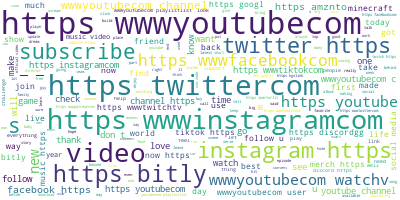

In [10]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


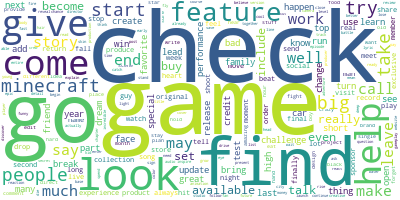

In [12]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join([','.join(d) for d in data_lemmatized])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [13]:
# Importing modules
import pandas as pd
import os

In [14]:
# df= pd.DataFrame(data = )
df = pd.DataFrame(columns= ["bigram","relative_weight"], data=[[k,v] for k,v in wordcloud.words_.items()])
df.to_excel("wordcloud.xlsx")

** **
#### Step 4: Prepare text for LDA analysis <a class="anchor\" id="data_preparation"></a>
** **

Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [15]:
# import gensim
# from gensim.utils import simple_preprocess
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use','contact', 'us' \
#     , 'welcome', 'skip', 'main', 'content', 'user', 'blog', 'menu', 'login', \
#         'register', 'search', 'form', 'discussion' 'menu', 'home', 'overall'])

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in stop_words] for doc in texts]


# data = papers.paper_text_processed.values.tolist()
# data_words = list(sent_to_words(data))

# # remove stop words
# data_words = remove_stopwords(data_words)

# print(data_words[:1][0][:30])

In [16]:
# import gensim.corpora as corpora

# # Create Dictionary
# id2word = corpora.Dictionary(data_words)

# # Create Corpus
# texts = data_words

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]

# # View
# print(corpus[:1][0][:30])

** **
#### Step 5: LDA model tranining <a class="anchor\" id="train_model"></a>
** **

To keep things simple, we'll keep all the parameters to default except for inputting the number of topics. For this tutorial, we will build a model with 10 topics where each topic is a combination of keywords, and each keyword contributes a certain weightage to the topic.

In [17]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.004*"check" + 0.004*"find" + 0.004*"look" + 0.004*"say" + 0.003*"come" + '
  '0.003*"game" + 0.003*"thing" + 0.003*"even" + 0.003*"help" + '
  '0.003*"minecraft"'),
 (1,
  '0.004*"check" + 0.003*"may" + 0.003*"find" + 0.003*"help" + 0.003*"look" + '
  '0.003*"include" + 0.003*"win" + 0.003*"year" + 0.003*"take" + '
  '0.003*"friend"'),
 (2,
  '0.034*"minecraft" + 0.004*"give" + 0.004*"check" + 0.004*"buy" + '
  '0.004*"challenge" + 0.004*"game" + 0.003*"try" + 0.003*"short" + '
  '0.003*"even" + 0.003*"big"'),
 (3,
  '0.005*"game" + 0.005*"find" + 0.004*"go" + 0.003*"minecraft" + 0.003*"end" '
  '+ 0.003*"break" + 0.003*"people" + 0.003*"week" + 0.002*"check" + '
  '0.002*"feature"'),
 (4,
  '0.009*"would" + 0.005*"game" + 0.004*"podcast" + 0.003*"give" + '
  '0.003*"look" + 0.003*"available" + 0.003*"help" + 0.003*"work" + '
  '0.003*"check" + 0.003*"talent"'),
 (5,
  '0.007*"game" + 0.005*"car" + 0.005*"friend" + 0.004*"check" + 0.004*"visit" '
  '+ 0.003*"find" + 0.003*"co

In [18]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [19]:
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=10, 
                                       random_state=100,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b, workers= 11)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()



[(0,
  '0.014*"highlight" + 0.012*"talent" + 0.010*"win" + 0.009*"final" + '
  '0.009*"match" + 0.009*"game" + 0.007*"big" + 0.007*"score" + 0.006*"soccer" '
  '+ 0.006*"peacock"'),
 (1,
  '0.044*"minecraft" + 0.014*"friend" + 0.011*"short" + 0.009*"game" + '
  '0.009*"challenge" + 0.009*"comment" + 0.006*"fun" + 0.006*"check" + '
  '0.006*"find" + 0.006*"dream"'),
 (2,
  '0.015*"producer" + 0.011*"production" + 0.009*"director" + 0.007*"editor" + '
  '0.007*"assistant" + 0.006*"feature" + 0.006*"engine" + 0.006*"try" + '
  '0.005*"designer" + 0.005*"celebrity"'),
 (3,
  '0.017*"game" + 0.010*"battle" + 0.008*"clan" + 0.008*"reaction" + '
  '0.007*"real" + 0.007*"purchase" + 0.007*"clash" + 0.007*"gta" + '
  '0.007*"service" + 0.006*"art"'),
 (4,
  '0.008*"store" + 0.008*"check" + 0.007*"car" + 0.007*"work" + '
  '0.006*"podcast" + 0.005*"may" + 0.005*"would" + 0.005*"pokemon" + '
  '0.005*"product" + 0.005*"help"'),
 (5,
  '0.009*"mrbeast" + 0.007*"death" + 0.007*"people" + 0.006*"tak

In [20]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 4
max_topics = 5
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

"""
----------------the OG model setup----------------
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
---------------------------------------------------
"""

# Alpha parameter
alpha =[0.01]
"""
----------------the OG model setup----------------
# alpha.append('symmetric')
# alpha.append('asymmetric')
"""

# Beta parameter
beta =[0.01]
"""
----------------the OG model setup----------------
# beta.append('symmetric')
"""

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

# corpus_title = ['75% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

print((len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))    


2


In [21]:

len(corpus_sets)

2

In [22]:

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    # pd.DataFrame(model_results).to_csv('C:\\subtlerealm\\results\\lda_tuning_results.csv', index=False)
    pbar.close()


100%|██████████| 2/2 [00:31<00:00, 15.89s/it]


In [23]:
type(lda_model)

gensim.models.ldamulticore.LdaMulticore

In [24]:
pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)

In [25]:
result_out = pd.read_csv("lda_tuning_results.csv")
result_out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Validation_Set  2 non-null      object 
 1   Topics          2 non-null      int64  
 2   Alpha           2 non-null      float64
 3   Beta            2 non-null      float64
 4   Coherence       2 non-null      float64
dtypes: float64(3), int64(1), object(1)
memory usage: 208.0+ bytes


In [26]:
result_out.sort_values('Coherence',ascending=False).head(1)

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,4,0.01,0.01,0.367571


In [27]:
num_topics = 8
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.31, workers = 3)
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())

[(0,
  '0.012*"pokemon" + 0.008*"mrbeast" + 0.007*"football" + 0.007*"highlight" + '
  '0.007*"game" + 0.006*"short" + 0.004*"fan" + 0.004*"win" + 0.004*"warrior" '
  '+ 0.004*"kick"'),
 (1,
  '0.010*"friend" + 0.007*"inquiry" + 0.006*"medium" + 0.005*"watch" + '
  '0.005*"read" + 0.004*"comment" + 0.004*"find" + 0.004*"art" + 0.004*"hit" + '
  '0.004*"check"'),
 (2,
  '0.009*"game" + 0.008*"battle" + 0.006*"clan" + 0.006*"clash" + '
  '0.005*"service" + 0.004*"real" + 0.004*"legend" + 0.004*"pc" + 0.004*"race" '
  '+ 0.004*"village"'),
 (3,
  '0.008*"reaction" + 0.007*"food" + 0.005*"podcast" + 0.005*"gta" + '
  '0.004*"index" + 0.004*"week" + 0.004*"egg" + 0.004*"fair" + '
  '0.004*"creative" + 0.003*"add"'),
 (4,
  '0.023*"minecraft" + 0.009*"check" + 0.008*"challenge" + 0.008*"game" + '
  '0.006*"find" + 0.006*"store" + 0.006*"help" + 0.005*"car" + 0.005*"try" + '
  '0.005*"comment"'),
 (5,
  '0.007*"say" + 0.007*"go" + 0.006*"look" + 0.006*"would" + 0.006*"take" + '
  '0.006*"leav

In [28]:
%pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [29]:
doc_lda = lda_model[corpus]
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/decomposition/_lda.py:29: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [30]:



LDAvis_data_filepath = os.path.join('ldavis_final_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_final_'+ str(num_topics) +'.html')

LDAvis_prepared

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.130169  0.162686       1        1  23.307582
4     -0.159408 -0.070737       2        1  21.897421
5     -0.132359 -0.076749       3        1  18.965038
7      0.052753  0.063984       4        1   8.779294
3      0.081895 -0.072733       5        1   7.395170
1      0.050817 -0.075719       6        1   7.015987
2      0.090146  0.070569       7        1   6.995131
0      0.146325 -0.001301       8        1   5.644378, topic_info=           Term         Freq        Total Category  logprob  loglift
1228  minecraft  1150.000000  1150.000000  Default  30.0000  30.0000
329        game   888.000000   888.000000  Default  29.0000  29.0000
215   challenge   430.000000   430.000000  Default  28.0000  28.0000
1301        say   322.000000   322.000000  Default  27.0000  27.0000
239      friend   449.000000   449.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
144         add    31.017907   229.607033   Topic8  -6.0220   0.8727
40          big    28.314484   402.263042   Topic8  -6.1132   0.2208
135        lead    26.334566   233.015906   Topic8  -6.1857   0.6943
391         box    25.045576   157.767006   Topic8  -6.2358   1.0341
652     podcast    24.360144   276.614384   Topic8  -6.2636   0.4448

[538 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1940      4  0.300849     ability
1940      7  0.676910     ability
1862      6  0.918019    absolute
3723      2  0.959169  absolutely
1475      1  0.960244      action
...     ...       ...         ...
1690      1  0.680664        year
1690      2  0.167897        year
1690      3  0.077142        year
1690      4  0.068066        year
1690      6  0.004538        year

[1237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 8, 4, 2, 3, 1])

** **
#### Step 6: Analyzing our LDA model <a class="anchor\" id="results"></a>
** **

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.

In [31]:
import pyLDAvis
import pyLDAvis.gensim_models
import pickle 

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/joblib/numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.130169  0.162686       1        1  23.307519
4     -0.159408 -0.070737       2        1  21.897501
5     -0.132359 -0.076749       3        1  18.965033
7      0.052753  0.063984       4        1   8.779298
3      0.081895 -0.072733       5        1   7.395163
1      0.050817 -0.075719       6        1   7.015972
2      0.090146  0.070569       7        1   6.995121
0      0.146325 -0.001301       8        1   5.644392, topic_info=           Term         Freq        Total Category  logprob  loglift
1228  minecraft  1150.000000  1150.000000  Default  30.0000  30.0000
329        game   888.000000   888.000000  Default  29.0000  29.0000
215   challenge   430.000000   430.000000  Default  28.0000  28.0000
1301        say   322.000000   322.000000  Default  27.0000  27.0000
239      friend   449.000000   449.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
144         add    31.017988   229.607320   Topic8  -6.0220   0.8727
40          big    28.314558   402.263165   Topic8  -6.1132   0.2208
135        lead    26.334634   233.015485   Topic8  -6.1857   0.6943
391         box    25.045641   157.767154   Topic8  -6.2358   1.0341
652     podcast    24.360207   276.614458   Topic8  -6.2636   0.4448

[538 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1940      4  0.300849     ability
1940      7  0.676910     ability
1862      6  0.918021    absolute
3723      2  0.959166  absolutely
1475      1  0.960247      action
...     ...       ...         ...
1690      1  0.680665        year
1690      2  0.167897        year
1690      3  0.077142        year
1690      4  0.068067        year
1690      6  0.004538        year

[1237 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 5, 6, 8, 4, 2, 3, 1])

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/linear_model/_least_angle.py:169: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will 

[Adapted from kapadias/mediumposts](https://github.com/kapadias/mediumposts)

** **
#### Closing Notes
Machine learning has become increasingly popular over the past decade, and recent advances in computational availability have led to exponential growth to people looking for ways how new methods can be incorporated to advance the field of Natural Language Processing.

Often, we treat topic models as black-box algorithms, but hopefully, this article addressed to shed light on the underlying math, and intuitions behind it, and high-level code to get you started with any textual data.

In the next article, we’ll go one step deeper into understanding how you can evaluate the performance of topic models, tune its hyper-parameters to get more intuitive and reliable results.

** **
#### References:
1. Topic model — Wikipedia. https://en.wikipedia.org/wiki/Topic_model
2. Distributed Strategies for Topic Modeling. https://www.ideals.illinois.edu/bitstream/handle/2142/46405/ParallelTopicModels.pdf?sequence=2&isAllowed=y
3. Topic Mapping — Software — Resources — Amaral Lab. https://amaral.northwestern.edu/resources/software/topic-mapping
4. A Survey of Topic Modeling in Text Mining. https://thesai.org/Downloads/Volume6No1/Paper_21-A_Survey_of_Topic_Modeling_in_Text_Mining.pdf
